<a href="https://colab.research.google.com/github/engmahaq8/The_AI_Engineer/blob/main/heart_disease_ML_TheAI_engineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/The AI Engineer /Machine Learning /heart.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<ipython-input-5-bc595f92bd5a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='viridis')


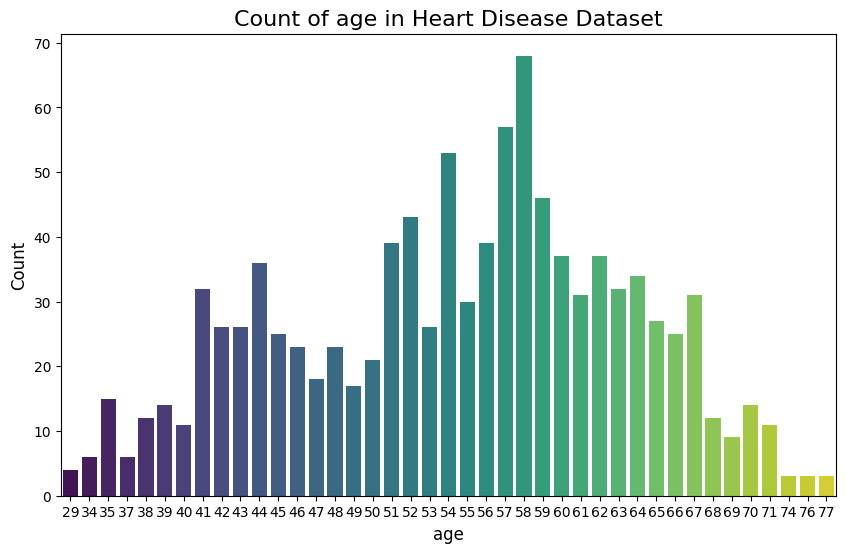

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for the DEATH_EVENT column
sns.countplot(x='age', data=df, palette='viridis')

# Add titles and labels for better understanding
plt.title('Count of age in Heart Disease Dataset', fontsize=16)
plt.xlabel('age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# Select The Target
y = df['target']

# Select The Features
X = df.drop(columns=['target'])

In [ ]:
# split data into training and validation data, for both features and target
# Import train_test_split
from sklearn.model_selection import train_test_split

# split data into training and test data, for both features and target
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20,random_state=42,stratify=y) #

In [ ]:
train_X.shape , test_X.shape , train_y.shape , test_y.shape

((820, 13), (205, 13), (820,), (205,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define model.
model = RandomForestClassifier()

In [ ]:
# Fit model
model.fit(train_X,train_y)

RandomForestClassifier()

In [ ]:
train_y_pred=model.predict(train_X)

In [ ]:
model.score(train_X,train_y)

1.0

In [ ]:
from sklearn.metrics import accuracy_score

train_y_pred=model.predict(train_X)
print("accuracy for training data=",accuracy_score(train_y,train_y_pred))
test_y_pred=model.predict(test_X)
print("accuracy for validation data=",accuracy_score(test_y,test_y_pred))

accuracy for training data= 1.0
accuracy for validation data= 1.0


In [ ]:
# Import LinearSVC from sikitlearn svm module
from sklearn.svm import LinearSVC

In [ ]:
#Import KNeighborsClassifier from sklearn neighbors module
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
moedls={"LinearSVC":LinearSVC(),"KNeighborsClassifier":KNeighborsClassifier(),"SVC":SVC(),"LogisticRegression":LogisticRegression(),"RandomForestClassifier":RandomForestClassifier()}

In [ ]:
results={}  #Create empty dictionary

In [ ]:
#Loop through the dictionary items,fitting the model in the training data and appending the model name and the model score
# on the test data to the results dictionary
for model_name,model in moedls.items():
  model.fit(train_X,train_y)
  results[model_name]=model.score(test_X,test_y)

results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8097560975609757,
 'KNeighborsClassifier': 0.697560975609756,
 'SVC': 0.7170731707317073,
 'LogisticRegression': 0.8341463414634146,
 'RandomForestClassifier': 1.0}

In [ ]:
#create a pandas with data as the values of the results dictionary
#the index as the key of the result and asingle column called accuracy
#save the result to df_results
df_results=pd.DataFrame(data=results.values(),index=results.keys(),columns=["accuracy"])
df_results

,accuracy
LinearSVC,0.809756
KNeighborsClassifier,0.697561
SVC,0.717073
LogisticRegression,0.834146
RandomForestClassifier,1.000000


<Axes: >

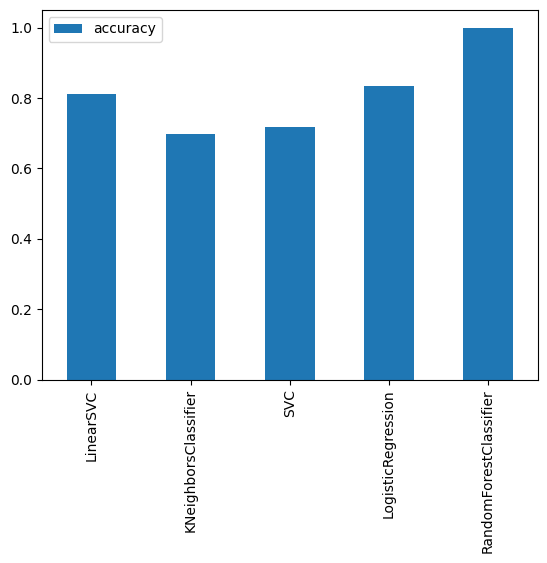

In [ ]:
#create a barplot of the results dataframe using plot.bar()
df_results.plot.bar()

HyperParameter Tuning

In [ ]:
log_grid={"C":np.logspace(-4,4,20),
          "solver" :["liblinear"]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the model
log_reg = LogisticRegression()

# Define the parameter grid
log_grid = {
    "C": np.logspace(-4, 4, 20),  # Regularization strength
    "solver": ["liblinear"]       # Optimization algorithm
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=log_grid,
    n_iter=10,             # Number of random parameter combinations to try
    scoring='accuracy',    # Metric for evaluation
    cv=5,                  # Number of folds for cross-validation
    random_state=42,       # For reproducibility
    verbose=1              # To show progress
)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_X,train_y)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'liblinear', 'C': 0.23357214690901212}
Best Score: 0.8451219512195122


Confusion Matrix

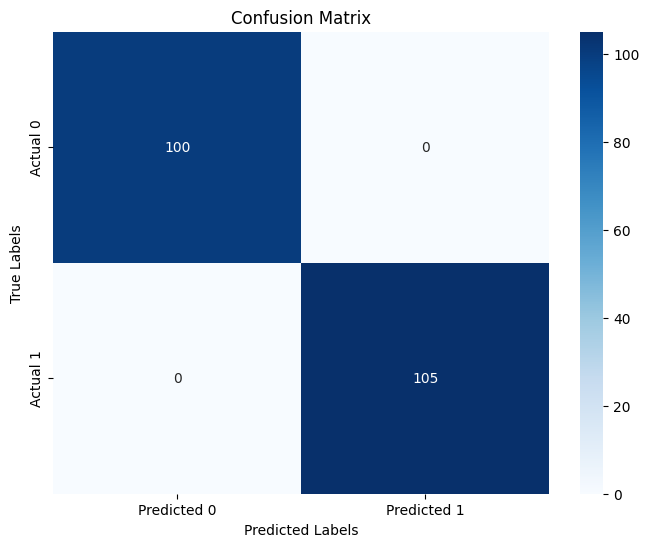

In [ ]:
# prompt: import confusuion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'model' is your trained model and 'test_X', 'test_y' are your test data
y_pred = model.predict(test_X)

# Calculate the confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

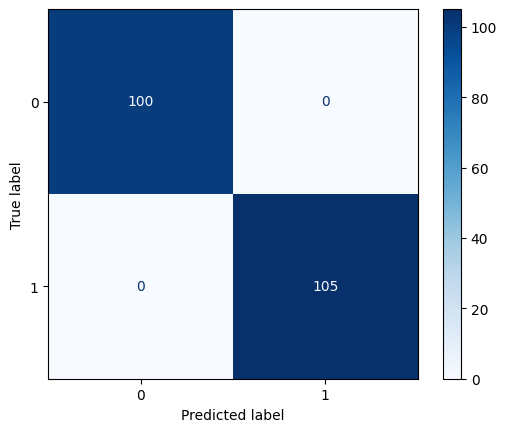

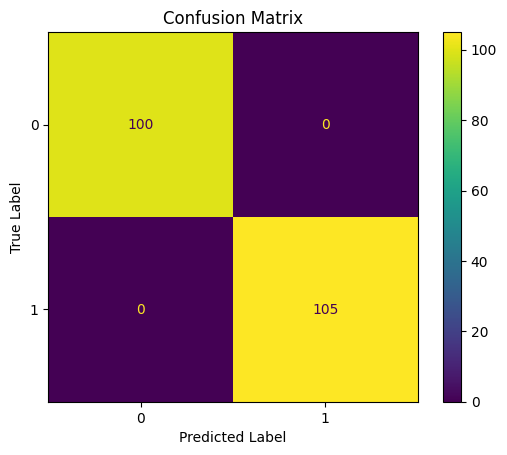

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(test_y,test_y_pred)
labels=model.classes_
matrix = ConfusionMatrixDisplay(cm,display_labels=labels) # ,display_labels=["00","11"]
# Change the color map to 'Greens'
matrix.plot(cmap='Blues')
matrix.plot()
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(train_y.value_counts())
print(test_y.value_counts())

target
1    421
0    399
Name: count, dtype: int64
target
1    105
0    100
Name: count, dtype: int64


In [ ]:


from sklearn.metrics import classification_report, precision_score, f1_score, recall_score


# Assuming 'model' is your trained model and 'test_X', 'test_y' are your test data
y_pred = model.predict(test_X)

# Print the classification report
print(classification_report(test_y, y_pred))

# Calculate and print individual metrics
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Precision: 1.0
Recall: 1.0
F1-score: 1.0


### **RocCurveDisplay **
The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR)

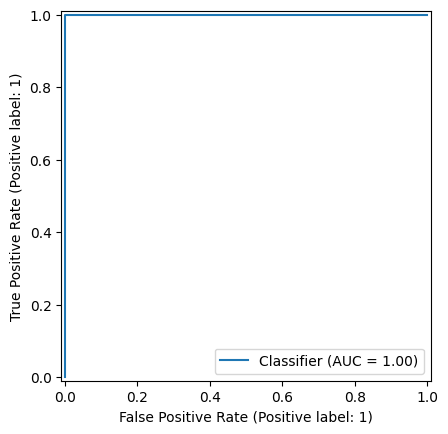

In [ ]:
#import RoCurveDisplay

from sklearn.metrics import RocCurveDisplay, roc_auc_score


# Assuming 'model' is your trained model and 'test_X', 'test_y' are your test data
y_pred_proba = model.predict_proba(test_X)[:, 1]  # Probabilities for the positive class

RocCurveDisplay.from_predictions(test_y, y_pred_proba)
plt.show()

In [ ]:
# Calculate AUC-ROC
auc = roc_auc_score(test_y, y_pred_proba )
print(f"AUC-ROC: {auc:.2f}")

AUC-ROC: 1.00


Exporting and Importing a trained Model

In [ ]:
#import dump from joblib and use dump to export the trained model to a file

In [ ]:
from joblib import dump,load
dump(model, 'model.joblib')

['model.joblib']

In [ ]:
# import the loaded trained model that you just exported , save to other variable

In [ ]:
loaded_model = load('model.joblib')

In [ ]:
from sklearn.metrics import accuracy_score


print(f"Model score:",{model.score(test_X,test_y)})

Model score: {1.0}


In [ ]:
print(f"Model score:",{loaded_model.score(test_X,test_y)})

Model score: {1.0}
